In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
from graphtda import FilteredGraph

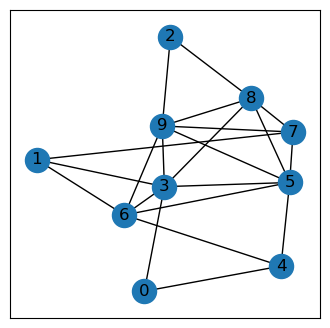

In [2]:
edgelist = [(0, 3), (0, 4), (1, 6), (1, 7), (1, 3), (2, 9), (2, 8), (3, 9), (3, 6), (3, 5), (4, 5), (4, 6), (5, 8), (5, 6), (6, 3), (6, 9), (7, 5), (8, 3), (8, 7), (9, 8), (9, 5), (9, 7)]
G = nx.Graph()
G.add_edges_from(edgelist)
fig, ax = plt.subplots(1, figsize=(4,4))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=2), ax=ax)

In [3]:
from graphtda.graphtda import HKS_bifiltration
FG = FilteredGraph(G, filtration_function=HKS_bifiltration)
FG.x_label = "heat"
FG.y_label = "time"

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [4]:
FG.compute_bipersistence(dim=0, x=0,y=0)
hf = FG.hilbert_function()

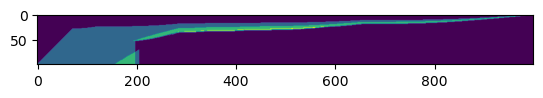

In [5]:
f,ax = plt.subplots()
ax.imshow(hf)
plt.show()

In [6]:
from graphtda.graphtda import hks, ollivier_ricci_curvature
FG1 = FilteredGraph(G,hks, t=10)
FG2 = FilteredGraph(G, ollivier_ricci_curvature, alpha=0.5)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [7]:
from graphtda.graphtda import product_bifiltration
FG = FilteredGraph(G, product_bifiltration, G1=FG1, G2=FG2)
FG.rivet_bifiltration().appearances

[[(0.04891222315955798, 0.08333333333333337)],
 [(0.11849712141125122, 0.08333333333333337)],
 [(0.10586844333591115, 0.16666666666666663)],
 [(0.22468626027196023, 0.25)],
 [(0.21971985705568503, 0.1499999999999999)],
 [(0.04774377461901582, 0.1499999999999999)],
 [(0.029330015103619708, 0.16666666666666663)],
 [(0.0976177791487304, 0.1499999999999999)],
 [(0.000258550325156792, 0.2500000000000001)],
 [(0.1168680449798062, 0.2499999999999999)],
 [(0.11849712141125122, 0.08333333333333337)],
 [(0.10586844333591115, 0.33333333333333337)],
 [(0.22468626027196023, 0.25)],
 [(0.21971985705568503, 0.25)],
 [(0.11849712141125122, 0.3833333333333333)],
 [(0.11849712141125122, 0.4166666666666665)],
 [(0.11849712141125122, 0.1499999999999999)],
 [(0.10586844333591115, 0.16666666666666663)],
 [(0.10586844333591115, 0.23333333333333328)],
 [(0.22468626027196023, 0.2666666666666666)],
 [(0.22468626027196023, 0.2500000000000001)],
 [(0.21971985705568503, 0.1499999999999999)],
 [(0.21971985705568503

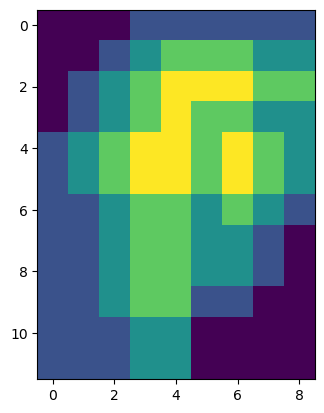

In [8]:
FG.compute_bipersistence(dim=0, x=0,y=0)
hf = FG.hilbert_function()
f,ax = plt.subplots()
ax.imshow(hf)
plt.show()

In [9]:
from graphtda.graphtda import interlevel_bifiltration
FG = FilteredGraph(FG2.Graph, interlevel_bifiltration, FG=FG2, keep_nodes=False)
FG.xreverse = True
FG.rivet_bifiltration().xreverse

True

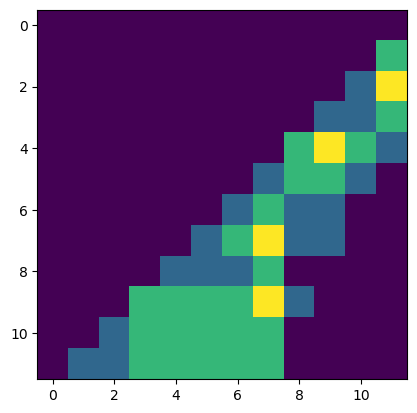

In [11]:
FG.compute_bipersistence(dim=0, x=0,y=0)
hf = FG.hilbert_function()
f,ax = plt.subplots()
ax.imshow(hf)
plt.show()